In [1]:
import torch

## 2.1 Создание нейронов и полносвязных слоев

2.1.1. Используя операции над матрицами и векторами из библиотеки `torch`, реализовать нейрон с заданными весами `weights` и `bias`. Прогнать вектор `inputs` через нейрон и вывести результат.

In [2]:
class Neuron:
  def __init__(self, weights, bias):
    # <создать атрибуты объекта weights и bias>
    self.weights = weights
    self.bias = bias
    pass

  def forward(self, inputs):
    return torch.dot(self.weights, inputs) + self.bias   # @ скалярное произведение

In [3]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([-0.2, 0.3, -0.5, 0.7])
bias = 3.14

2.1.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой с заданными весами `weights` и `biases`. Прогнать вектор `inputs` через слой и вывести результат.

In [4]:
class Linear:
  def __init__(self, weights, biases):
    # <создать атрибуты объекта weights и biases>
    self.weights = weights
    self.biases = biases
    pass

  def forward(self, inputs):
    return torch.mv(self.weights, inputs) + self.bias

In [5]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([[-0.2, 0.3, -0.5, 0.7],
                        [0.5, -0.91, 0.26, -0.5],
                        [-0.26, -0.27, 0.17, 0.87]]).T

biases = torch.tensor([3.14, 2.71, 7.2])

2.1.3 Реализовать полносвязный слой из __2.1.2__ таким образом, чтобы он мог принимать на вход матрицу (батч) с данными. Продемонстрировать работу.
Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.


In [6]:
class Linear:
  def __init__(self, weights, biases):
    # <создать атрибуты объекта weights и biases>
    self.weights = weights
    self.biases = biases
    pass

  def forward(self, inputs):
    return torch.mm(self.weights, inputs) + self.bias

In [7]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

2.1.4 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой из `n_neurons` нейронов с `n_features` весами у каждого нейрона (инициализируются из стандартного нормального распределения). Прогнать вектор `inputs` через слой и вывести результат. Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.

In [8]:
class Linear:
  def __init__(self, n_inputs, n_neurons):
    # <создать атрибуты объекта weights и biases>
    self.weights = torch.randn(n_inputs, n_neurons)
    self.biases = torch.zeros(n_neurons)

    pass

  def forward(self, inputs):
    return inputs @ self.weights + self.biases

2.1.5 Используя решение из __2.1.4__, создать 2 полносвязных слоя и пропустить матрицу `inputs` последовательно через эти два слоя. Количество нейронов в первом слое выбрать произвольно, количество нейронов во втором слое выбрать так, чтобы результатом прогона являлась матрица (3x7).

In [9]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

layer1 = Linear(4, 3)
layer2 = Linear(3, 7)
output = layer1.forward(inputs)
layer2.forward(output)

tensor([[-5.8217e-01, -4.1918e+00,  5.6799e-01,  6.4860e-01,  4.8879e+00,
          8.2980e-02,  1.4645e-03],
        [-5.2437e+00, -5.5520e+00,  2.5329e+00,  2.7377e+00,  1.2172e+01,
         -8.5633e-01, -1.1214e+00],
        [-2.9329e+00, -2.0030e+00,  1.7531e+00,  2.3235e+00,  7.9267e+00,
         -8.2059e-01, -7.0922e-01]])

## 2.2 Создание функций активации

2.2.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ReLU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f4353f4e3e484130504049599d2e7b040793e1eb)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

In [10]:
class ReLU:
  def forward(self, inputs):
    # <реализовать логику ReLU>
    return inputs * (inputs > 0)   # x*(x>0)

In [12]:
matrix = torch.randn(4, 3)
matrix

tensor([[-0.0749,  1.3913, -1.5338],
        [-0.4356,  0.2455, -0.5073],
        [-0.6058,  0.3555, -0.6511],
        [-0.2729, -0.4235, -0.7610]])

In [13]:
relu_activation = ReLU()
output = relu_activation.forward(matrix)

output

tensor([[0.0000, 1.3913, 0.0000],
        [0.0000, 0.2455, 0.0000],
        [0.0000, 0.3555, 0.0000],
        [0.0000, 0.0000, 0.0000]])

2.2.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации softmax:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/6d7500d980c313da83e4117da701bf7c8f1982f5)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации. Строки матрицы трактовать как выходы линейного слоя некоторого классификатора для 4 различных примеров.

In [14]:
class Softmax:  # переводит выходы из нейронной сети в вероятности
  def forward(self, inputs):
    return torch.exp(inputs) / torch.exp(inputs.sum())

In [15]:
matrix = torch.randn(4, 3)
matrix

tensor([[ 7.4309e-01, -6.5383e-01, -2.0626e+00],
        [-8.2219e-02,  1.0370e+00,  6.2055e-01],
        [ 6.1079e-02,  6.5472e-01, -5.4386e-01],
        [ 7.2272e-01, -8.2777e-04,  2.4823e+00]])

In [16]:
softmax_activation = Softmax()
output = softmax_activation.forward(matrix)
output

tensor([[0.1070, 0.0265, 0.0065],
        [0.0469, 0.1435, 0.0946],
        [0.0541, 0.0979, 0.0295],
        [0.1048, 0.0508, 0.6091]])

2.2.3 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ELU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/eb23becd37c3602c4838e53f532163279192e4fd)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

In [23]:
class ELU:
  def __init__(self, alpha):
    # <создать атрибут объекта alpha>
    self.alpha = alpha

  def forward(self, inputs):
    # <реализовать логику ReLU>
    return torch.where(inputs < 0, self.alpha * (torch.exp(inputs) - 1), inputs)

In [24]:
matrix = torch.randn(4, 3)
matrix

tensor([[ 0.0727, -2.1806, -0.3948],
        [ 0.5541, -0.2559, -0.5428],
        [-0.3054, -0.0617, -0.9965],
        [-0.6143,  1.1146,  0.4322]])

In [25]:
elu_activation = ELU(alpha=1.0)
output = elu_activation.forward(matrix)
output

tensor([[ 0.0727, -0.8870, -0.3262],
        [ 0.5541, -0.2258, -0.4189],
        [-0.2632, -0.0598, -0.6308],
        [-0.4590,  1.1146,  0.4322]])

## 2.3 Создание функции потерь

2.3.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь MSE:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/e258221518869aa1c6561bb75b99476c4734108e)

Создать полносвязный слой с 1 нейроном, прогнать через него батч `inputs` и посчитать значение MSE, трактуя вектор `y` как вектор правильных ответов.

In [57]:
class MSELoss:
    def __init__(self):
        self.linear_layer = torch.nn.Linear(4, 1)

    def forward(self, y_pred, y_true):
        inputs = self.linear_layer(y_pred)

        mse_loss = torch.mean((inputs - y_true.view(-1, 1)) ** 2)
        return mse_loss

In [58]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

y = torch.tensor([2, 3, 4], dtype=torch.float32)

In [59]:
loss_fn = MSELoss()
loss = loss_fn.forward(inputs, y)
loss.item()

4.670261859893799

2.3.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь Categorical Cross-Entropy:

<img src="https://i.ibb.co/93gy1dN/Screenshot-9.png" width="200">

Создать полносвязный слой с 3 нейронами и прогнать через него батч `inputs`. Полученный результат пропустить через функцию активации softmax. Посчитать значение CCE, трактуя вектор `y` как вектор правильных ответов.

In [60]:
class CategoricalCrossentropyLoss:
  def forward(self, y_pred, y_true):
     log_y_pred = torch.log(y_pred)
     cce_loss = -torch.sum(y * log_y_pred)
     return cce_loss

In [61]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                        [2, 5, -1, 2],
                        [-1.5, 2.7, 3.3, -0.8]])
y = torch.tensor([1, 0, 0])

In [62]:
y_pred = torch.tensor([0.7, 0.2, 0.1])
y_true = torch.tensor([1.0, 0.0, 0.0])

loss_fn = CategoricalCrossentropyLoss()

loss = loss_fn.forward(y_pred, y_true)
loss.item()

0.3566749691963196

2.3.3 Модифицировать 2.3.1, добавив L2-регуляризацию.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/d92ca2429275bfdc0474523babbafe014ca8b580)


In [71]:
class MSELossL2:
    def __init__(self, lambda_, layer):
        self.alpha = lambda_
        self.layer = layer

    def data_loss(self, y_pred, y_true):
        mse_loss = torch.mean((y_pred - y_true) ** 2)
        return mse_loss

    def reg_loss(self):
        l2_reg = 0.0
        for param in self.layer.parameters():
            l2_reg += torch.norm(param, p=2) ** 2
        return 0.5 * self.alpha * l2_reg

    def forward(self, y_pred, y_true):
        return self.data_loss(y_pred, y_true) + self.reg_loss()


In [73]:
alpha = 0.01  # Коэффициент регуляризации
layer = torch.nn.Linear(3, 3)
loss_fn = MSELossL2(alpha, layer)
loss = loss_fn.forward(y_pred, y_true)
print(loss.item())

0.05632176622748375


## 2.4 Обратное распространение ошибки

2.4.1 Используя один нейрон и SGD (1 пример за шаг), решите задачу регрессии

In [105]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

[Граф вычислений для этой задачи](https://i.ibb.co/2dhDxZx/photo-2021-02-15-17-18-04.jpg)

2.4.1.1 Реализуйте класс `SquaredLoss`


In [82]:
class SquaredLoss:
  def forward(self, y_pred, y_true):
    return (y_pred - y_true)**2

  def backward(self, y_pred, y_true):
    self.dinput = 2*(y_pred - y_true) # df/dc

2.4.1.2. Модифицируйте класс `Neuron` из __2.1.1__:

  1) Сделайте так, чтобы веса нейрона инициализировались из стандартного нормального распределения

  2) Реализуйте расчет градиента относительно весов `weights` и `bias`

In [76]:
class Neuron:
  def __init__(self, n_inputs):
    self.weights = torch.randn(n_inputs)
    self.bias = torch.randn(1)

  def forward(self, inputs):
    # <реализовать логику нейрона>
    self.input = inputs
    return (inputs * self.weights).sum() + self.bias

  def backward(self, dvalue):
    # dvalue - значение производной, которое приходит нейрону от следующего слоя сети
    # в данном случае это будет значение df/dc (созданное методом backwards у объекта MSELoss)
    self.dweights = dvalue * self.input  # df/dW
    self.dinput = dvalue * self.weights  # df/wX
    self.dbias = dvalue  # df/db

2.4.1.3 Допишите цикл для настройки весов нейрона

[SGD](https://ru.wikipedia.org/wiki/%D0%A1%D1%82%D0%BE%D1%85%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B9_%D1%81%D0%BF%D1%83%D1%81%D0%BA)

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/dda3670f8a8996a0d3bf80856bb4a166cc8db6d4)

In [79]:
n_inputs = X.shape[1]  # <размерность элемента выборки >
learning_rate = 0.1 #  скорость обучения
n_epoch = 100 #  количество эпох

neuron = Neuron(n_inputs)
loss = SquaredLoss()

losses = []
for epoch in range(n_epoch):
  for x_example, y_example in zip(X, y):
    # forward pass
    y_pred = neuron.forward(x_example)# <прогон через нейрон>
    curr_loss = loss.forward(y_pred, y_example)  # <прогон через функцию потерь>
    losses.append(curr_loss)

    # backprop
    # <вызов методов backward>
    # обратите внимание на последовательность вызовов: от конца к началу
    loss.backward(y_pred, y_example)
    neuron.backward(loss.dinput)

    # <шаг оптимизации для весов (weights и bias) нейрона>
    neuron.weights = neuron.weights - learning_rate*neuron.dweights
    neuron.bias = neuron.bias - learning_rate*neuron.dbias

2.4.2 Решите задачу 2.4.1, используя пакетный градиентный спуск

Вычисления для этой задачи:
[1](https://i.ibb.co/rmtQT6P/photo-2021-02-15-18-00-43.jpg)
[2](https://i.ibb.co/NmCFVnQ/photo-2021-02-15-18-01-17.jpg)

In [80]:
import torch.optim as optim

In [84]:
n_inputs = X.shape[1] # <размерность элемента выборки >
lr = 0.1 #  скорость обучения
n_epoch = 100 #  количество эпох

neuron = Neuron(n_inputs)
loss_func = SquaredLoss()
optimizer = optim.SGD([neuron.weights, neuron.bias], lr=learning_rate)

losses = []
for epoch in range(n_epoch):
    epoch_losses = []
    for x_example, y_example in zip(X, y):
        # forward pass
        y_pred = neuron.forward(x_example)
        curr_loss = loss_func.forward(y_pred, y_example)
        epoch_losses.append(curr_loss.item())

        # backprop
        # <вызов методов backward>
        # обратите внимание на последовательность вызовов: от конца к началу
        optimizer.zero_grad()
        loss_func.backward(y_pred, y_example)
        neuron.backward(loss_func.dinput)
        optimizer.step()

    avg_loss = sum(epoch_losses) / len(epoch_losses)
    losses.append(avg_loss)

2.4.1.1 Модифицируйте класс `MSELoss` из __2.3.1__, реализовав расчет производной относительно предыдущего слоя с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами


In [85]:
class MSELoss:
  def forward(self, y_pred, y_true):
    return torch.mean((y_pred - y_true)**2)  # <реализовать логику MSE>

  def backward(self, y_pred, y_true):
    self.dinput = 2 * (y_pred - y_true) / len(y_true)  # df/dy^

2.4.2.2. Модифицируйте класс `Neuron` из __2.4.1.2__:

  1) Реализуйте метод `forward` таким образом, чтобы он мог принимать на вход матрицу (батч) с данными.

  2) Реализуйте расчет градиента относительно весов `weights` и `bias` с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами

In [87]:
class Neuron:
  def __init__(self, n_inputs):
    # <создать атрибуты объекта weights и bias>
    self.weights = torch.randn(n_inputs)
    self.bias = torch.tensor(1)

  def forward(self, inputs):
    self.inputs = inputs
    return inputs @ self.weights.T + self.bias  # для вектора на матрицу inputs.mm(self.weights.unsqueeze(1)).squeeze() + self.bias

  def backward(self, dvalue):
    # dvalue - значение градиента, которое приходит нейрону от следующего слоя сети
    # в данном случае это будет градиент L по y^ (созданный методом backwards у объекта MSELoss)

    #self.dweights = self.inputs.T.mm(dvalue) / dvalue.size(0)
    self.dweights = (self.inputs.T @ dvalue) / dvalue.size(0)


    self.dbias = dvalue.sum() / dvalue.size(0)

In [93]:
neuron = Neuron(4)
x = torch.randn((2,4))
neuron.forward(x)

tensor([0.1996, 3.2766])

2.4.2.3 Допишите цикл для настройки весов нейрона

In [95]:
n_inputs = X.shape[1]  # <размерность элемента выборки >
learning_rate = 0.1 #  скорость обучения
n_epoch = 100 #  количество эпох

neuron = Neuron(n_inputs)
loss = MSELoss()


for epoch in range(n_epoch):
    # forward pass
    y_pred = neuron.forward(X)  # <прогон через нейрон>
    curr_loss = loss.forward(y_pred, y)  # <прогон через функцию потерь>
    losses.append(curr_loss)

    # backprop
    loss.backward(y_pred, y)  # <вызов методов backward>
    neuron.backward(loss.dinput)  # обратите внимание на последовательность вызовов: от конца к началу

    # <шаг оптимизации для весов (weights и bias) нейрона>
    neuron.weights = neuron.weights - lr*neuron.dweights
    neuron.bias = neuron.bias - lr*neuron.dbias

2.4.3  Используя один полносвязный слой и  пакетный градиетный спуск, решите задачу регрессии из __2.4.1__

In [106]:
# Добавляем усреднение для ошибки и градиента
class SquaredLoss:
    def forward(self, y_pred, y_true):
        return ((y_pred - y_true)**2).mean()

    def backward(self, y_pred, y_true):
        self.dinput = 2*(y_pred - y_true) / y_true.size(0)

In [107]:
neuron = Neuron(n_inputs)
loss = SquaredLoss()

losses = []
for epoch in range(n_epoch):
   # forward pass
    y_pred = neuron.forward(X)
    curr_loss = loss.forward(y_pred, y)
    losses.append(curr_loss.item())

    # backprop
    loss.backward(y_pred, y)
    neuron.backward(loss.dinput)

    # <шаг оптимизации для весов (weights и bias) нейрона>
    neuron.weights = neuron.weights - lr*neuron.dweights
    neuron.bias = neuron.bias - lr*neuron.dbias

2.4.3.1 Модифицируйте класс `Linear` из __2.1.4__. ([вычисление градиентов](https://i.ibb.co/kgVR6m6/photo-2021-02-15-21-30-28.jpg))

In [108]:
class Linear:
  def __init__(self, n_features, n_neurons):
    # <создать атрибуты объекта weights и biases>
    self.weights = torch.randn((n_features, n_neurons))
    self.bias = torch.randn(n_neurons)

  def forward(self, inputs):
    self.inputs = inputs
    return inputs.mm(self.weights) + self.bias  # <реализовать логику слоя>

  def backward(self, dvalues):
    self.dweights = self.inputs.T.mm(dvalues)  # df/dW
    self.dbiases = torch.ones(1, dvalues.shape[0]).mm(dvalues)  # df/db
    self.dinputs = dvalues.mm(self.weights.T)  # df/dX

2.4.3.2 Создайте слой с одним нейроном. Используя класс MSELoss из 2.4.2, убедитесь, что модель обучается

In [110]:
X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)  # Изменение формы для согласованности

In [111]:
n_inputs = X.shape[1]  # <размерность элемента выборки >
learning_rate = 0.1  #  скорость обучения
n_epoch = 100  #  количество эпох

linear = Linear(n_inputs, 1)
loss = MSELoss()


for epoch in range(n_epoch):
    # forward pass
    y_pred = linear.forward(X)# <прогон через нейрон>
    curr_loss = loss.forward(y_pred, y) # <прогон через функцию потерь>
    losses.append(curr_loss)

    # backprop
    # <вызов методов backward>
    # обратите внимание на последовательность вызовов: от конца к началу
    loss.backward(y_pred, y)
    linear.backward(loss.dinput)

    # <шаг оптимизации для весов (weights и bias) нейрона>
    linear.weights = linear.weights - lr*linear.dweights
    linear.bias = linear.bias - lr*linear.dbiases

2.4.4 Используя наработки из 2.4, создайте нейросеть и решите задачу регрессии.

Предлагаемая архитектура:
1. Полносвязный слой с 10 нейронами
2. Активация ReLU
3. Полносвязный слой с 1 нейроном

In [115]:
X = torch.linspace(-1, 1, 100).view(-1, 1)
y = X.pow(2) + 0.2 * torch.rand(X.size())

In [116]:
class Activation_ReLU:
  def forward(self, inputs):
    self.inputs = inputs
    self.output = inputs.clip(min=0)
    return self.output

  def backward(self, dvalues):
    self.dinputs = dvalues.clone()
    self.dinputs[self.inputs <= 0] = 0

In [117]:
class MSELoss:
  def forward(self, y_pred, y_true):
    return torch.mean((y_pred - y_true)**2)

  def backward(self, y_pred, y_true):
    self.dinput = 2 * (y_pred - y_true) / len(y_true)

In [119]:
# создание компонентов сети
fc1 = Linear(X.shape[1], 10)
relu1 = Activation_ReLU()
fc2 = Linear(10, 1)

loss = MSELoss()
lr = 0.02

ys = []
for epoch in range(2001):
  # <forward pass>
  # fc1 > relu1 > fc2 > loss
  out = fc2.forward(relu1.forward(fc1.forward(X)))

  data_loss = loss.forward(out, y)  # <прогон через функцию потерь>

  if epoch % 200 == 0:
    print(f'epoch {epoch} mean loss {data_loss}')
    ys.append(out)

  # <backprop>
  # loss > fc2 > relu1 > fc1

  loss.backward(out, y)
  fc2.backward(loss.dinput)
  relu1.backward(fc2.dinputs)
  fc1.backward(relu1.dinputs)


  # <шаг оптимизации для fc1>
  fc1.weights = fc1.weights - lr*fc1.dweights
  fc1.bias = fc1.bias - lr*fc1.dbiases

  # <шаг оптимизации для fc2>
  fc2.weights = fc2.weights - lr*fc2.dweights
  fc2.bias = fc2.bias - lr*fc2.dbiases


epoch 0 mean loss 5.876419544219971
epoch 200 mean loss 0.03858984634280205
epoch 400 mean loss 0.02466481737792492
epoch 600 mean loss 0.016819952055811882
epoch 800 mean loss 0.012506501749157906
epoch 1000 mean loss 0.010077184066176414
epoch 1200 mean loss 0.008626585826277733
epoch 1400 mean loss 0.0076607512310147285
epoch 1600 mean loss 0.006943507120013237
epoch 1800 mean loss 0.006360603496432304
epoch 2000 mean loss 0.005890017841011286


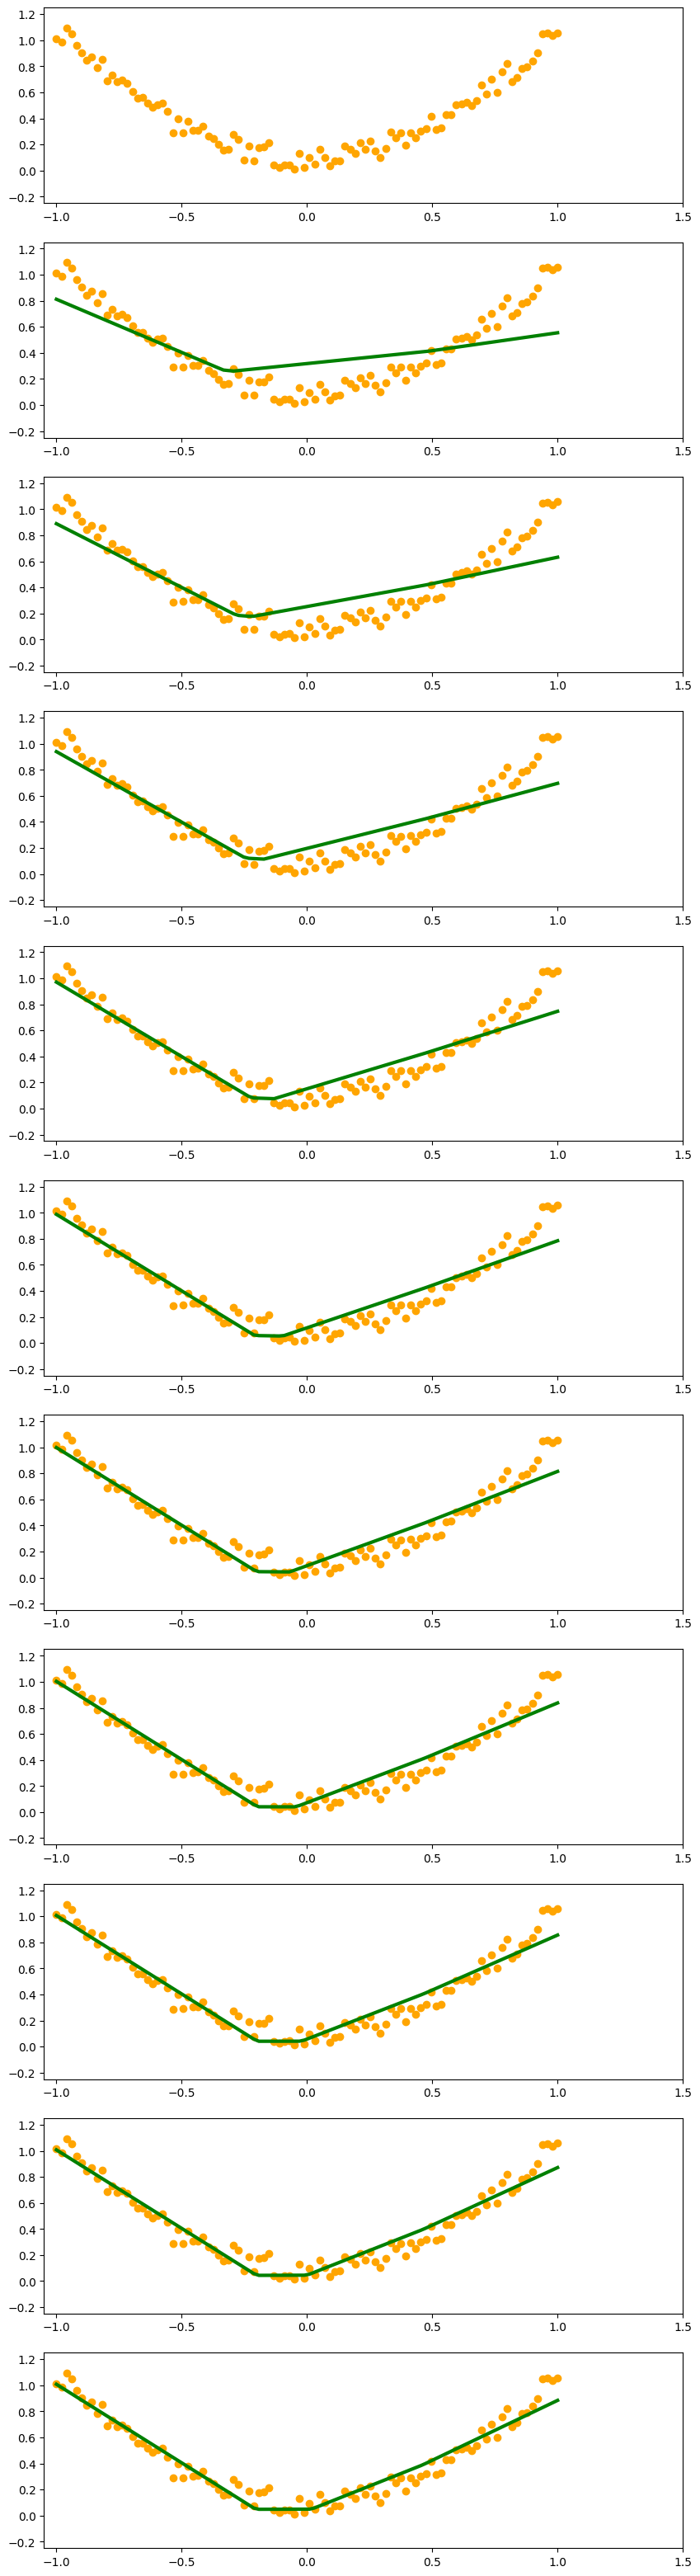

In [120]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(ys), 1, figsize=(10, 40))
for ax, y_ in zip(axs, ys):
  ax.scatter(X.numpy(), y.numpy(), color = "orange")
  ax.plot(X.numpy(), y_.numpy(), 'g-', lw=3)
  ax.set_xlim(-1.05, 1.5)
  ax.set_ylim(-0.25, 1.25)